# Case study: maintenance scheduling with genetic algorithms

##### Referência:
###### Negnevitsky, M., "Artificial Intelligence: A Guide to Intelligent Systems", Addison Wesley, Harlow, England, 2002. Sec. 7.5

###Algoritmos Genéticos
#### Autor: Airton Silva Mesquita Filho
##### Universidade Federal do Ceará - Brazil - 2021
##### ICA - Prof: AlmeidaJosé Almeida do Nascimento

Constraints and Optimum Criteria

Unit Number | Unit Capac. | Number of Interv

     1      |     20      |        2
     2      |     15      |        2
     3      |     35      |        1
     4      |     40      |        1
     5      |     15      |        1
     6      |     15      |        1
     7      |     10      |        1





In [94]:
from random import randint
import random
import numpy as np
import matplotlib.pyplot as plt

In [95]:
unit1 = ["1100", "0110", "0011"]
unit2 = ["1100", "0110", "0011"]
unit3 = ["1000", "0100", "0010", "0001"]
unit4 = ["1000", "0100", "0010", "0001"]
unit5 = ["1000", "0100", "0010", "0001"]
unit6 = ["1000", "0100", "0010", "0001"]
unit7 = ["1000", "0100", "0010", "0001"]

totalCapacity = 150

maxLoadByInterval = [80, 90, 65, 70]

Now we're gonna define a fitness function to evaluate the chromosome performance

In [96]:
def fitnessEvaluate(chromosome):
    interval = [0, 0, 0, 0]
    for i in range(4):
        interval[i] = 20*(int(chromosome[0][i])) + 15*(int(chromosome[1][i])) + 35*(int(chromosome[2][i])) + 40*(int(chromosome[3][i])) + 15*(int(chromosome[4][i])) + 15*(int(chromosome[5][i])) + 10*(int(chromosome[6][i]))
        interval[i] = totalCapacity - interval[i] - maxLoadByInterval[i]
    return min(interval)

def evaluate(pop, n):
    result = []
    for i in range(n):
        if(fitnessEvaluate(pop[i]) <= 0):
            result.append(1)
        else:
            result.append(fitnessEvaluate(pop[i]))
    return result        

Now we're gonna construct the genetic operators

In [97]:
def crossoverOperator(pop, pairs, pc):
    sons = []
    n_units = len(pop[0])
    for pair in pairs:
        prob = random.random()
        if prob <= pc:
            cut = random.randint(1,n_units - 1)
            son1 = pop[pair[0]][0:cut] + pop[pair[1]][cut:n_units]
            son2 = pop[pair[1]][0:cut] + pop[pair[0]][cut:n_units] 
        else:
            son1 = pop[pair[0]]
            son2 = pop[pair[1]]
        sons.append(son1)
        sons.append(son2)
    return sons

def mutationOperation(pop, pm):
    n_units = len(pop[0])
    for p  in pop:
        for n in range(n_units):
            prob = random.random()
            if prob <= pm:
                if n==0 or n==1:
                    posible_choices = [x for x in unit1 if x!=p[n]]
                else:
                    posible_choices = [x for x in unit3 if x!=p[n]]
                    gene = random.choice(posible_choices)
                    p[n] = gene
    return pop

def roulette(results):
    total = sum(results)   
    percents = list(map(lambda x:x/total,results)) 
    index = list(range(len(results)))
    p1 = random.choices(index,weights=percents)[0]
    p2 = random.choices([x for x in index if x != p1],weights= [percents[i] for i in range(len(percents)) if i!= p1])[0] 

    return p1,p2

def apply_roulette(f_results,n_pop):
    results = f_results.copy()
    pairs = []
    for i in range(n_pop//2):
        p1,p2 = roulette(results)
        pairs.append([p1,p2])
        results[p1] = 0
        results[p2] = 0

    return pairs

def new_generation(results,sons_results,pop,sons):
    new_pop = []
    n_pop = len(results)  
    
    total_results = results + sons_results
    indexes = np.argsort(total_results)[::-1]
    indexes = indexes[0:n_pop]

    for idx in indexes :
        if idx >= n_pop:
            pos = idx - n_pop
            new_pop.append(sons[pos])
        else :
            new_pop.append(pop[idx])
    return new_pop

Now we're gonna define the initial population and create the loop that will run the algorithms

In [98]:
n = 20 # Population Size
pc = 0.7 # Crossover Probability
pm = 0.01 # Mutation Probability
maxNumGen = 100

initialPop = []
for i in range(n):
    pop = [""]*7
    for j in range(7):
        if(j == 0 or j == 1):
            pop[j] = unit1[randint(0,2)]
        else:
            pop[j] = unit3[randint(0,3)]
    initialPop.append(pop)

population = initialPop.copy()
fitness_avg = []

for i in range(maxNumGen):
    results = evaluate(population, n)
    
    pairs = apply_roulette(results, n)

    nextGenPop = crossoverOperator(population, pairs, pc)
    nextGenPop = mutationOperation(nextGenPop, pm)

    nextGen_results = evaluate(nextGenPop, n)

    newPopulation = new_generation(results, nextGen_results, population, nextGenPop)

    newPop_results = evaluate(newPopulation, n)

    avg_result = np.mean(newPop_results)
    fitness_avg.append(avg_result)

    population = newPopulation

Text(0, 0.5, 'Fitness')

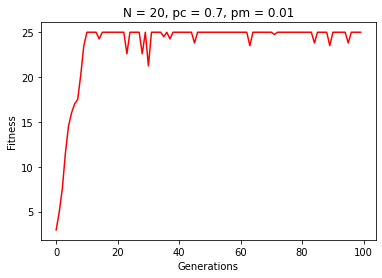

In [100]:
ger = list(range(0,maxNumGen))
plt.plot(ger,fitness_avg, color = 'red')
plt.title("N = 20, pc = 0.7, pm = 0.01")
plt.xlabel("Generations")
plt.ylabel("Fitness")